In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import csv file
df = pd.read_csv("births.csv")
df.head(2)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440


In [3]:
# Adding a new column Decade

df['decade'] = (df['year'] // 10) * 10
df.head(2)

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960


In [4]:
# Showing descrivptive 
df.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [5]:
#checking to see if data has any missing values

df.isna().sum()
#it looks like there are missing values in "day" column

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

In [6]:
#Checking to see Trend of male and female by decade 

trend = df.groupby(['decade', 'gender'])['year'].count().unstack()
trend

gender,F,M
decade,,
1960,384,384
1970,3811,3807
1980,3353,3352
1990,120,120
2000,108,108


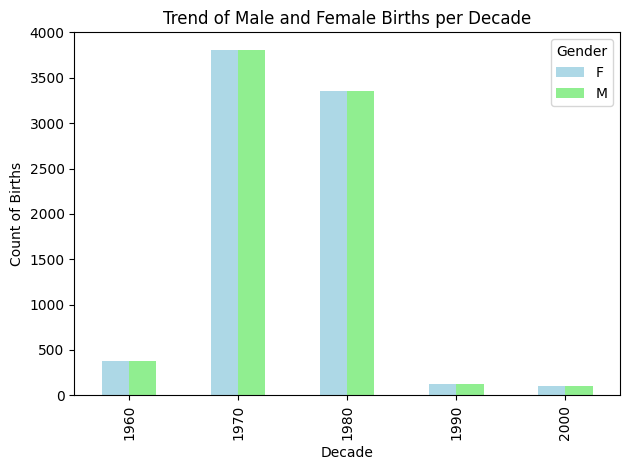

In [7]:
#Showing the above results on a plot
trend.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.xlabel('Decade')
plt.ylabel('Count of Births')
plt.title('Trend of Male and Female Births per Decade')
plt.legend(title='Gender')
 
plt.tight_layout()
plt.show()

In [8]:
#Seperating numerical values from string

new_df = df[['year', 'month', 'day', 'births', 'decade']]


import scipy.stats as stats
# Removing outliers
limit= 5

# Z-score standardization
z_scores = np.abs(stats.zscore(new_df)) 

# Filter data with acceptable z-scores
filtered_data = new_df[~(z_scores > limit).any(axis=1)]

# View the filtered data
filtered_data.head()

,year,month,day,births,decade
0,1969,1,1.0,4046,1960
1,1969,1,1.0,4440,1960
2,1969,1,2.0,4454,1960
3,1969,1,2.0,4548,1960
4,1969,1,3.0,4548,1960


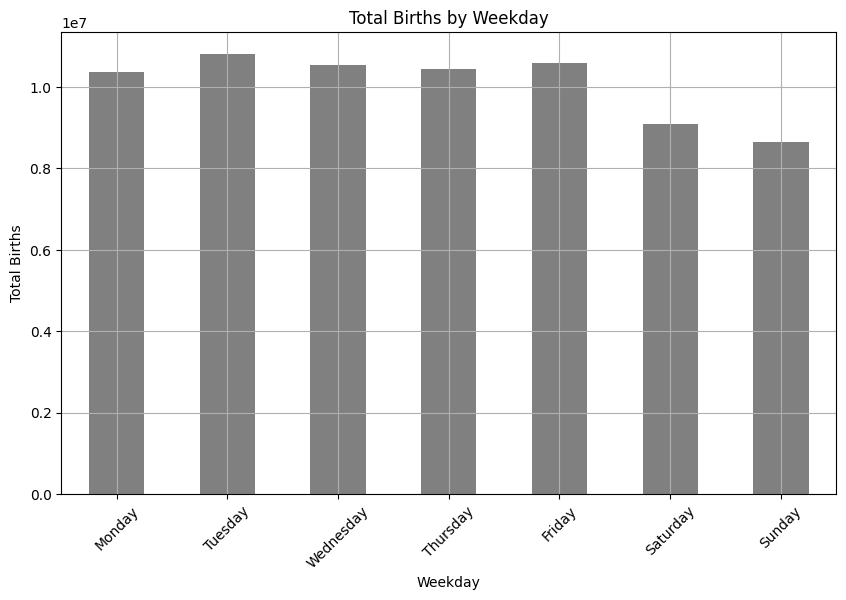

In [43]:
# Converting the columns into datetimeformat
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Droping rowns that have null/na values so it doest affect our data set
#you can also fill these empty values but calculate the mean and replace those with them
df = df.dropna(subset=['date'])

# Extract weekday from the date
df['weekday'] = df['date'].dt.day_name()

# Grouping 
birth_weekday = df.groupby('weekday')['births'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting

plt.figure(figsize=(10, 6))
birth_weekday.plot(kind='bar', color='grey')
plt.grid()
plt.xlabel("Weekday")
plt.ylabel('Total Births')
plt.title("Total Births by Weekday")
plt.xticks(rotation=45) # so its easily readable

plt.show()


In [13]:
# Grouping the data by month and day 
# Group by Month
month_groups = df.groupby(df['month'])['births'].sum().reset_index()
print(month_groups.head())

# Group by Day
day_groups = df.groupby(df['day'])['births'].sum().reset_index()
month_groups.head()

   month    births
0      1  12364197
1      2  11541178
2      3  12678844
3      4  12085891
4      5  12624972


,month,births
0,1,12364197
1,2,11541178
2,3,12678844
3,4,12085891
4,5,12624972


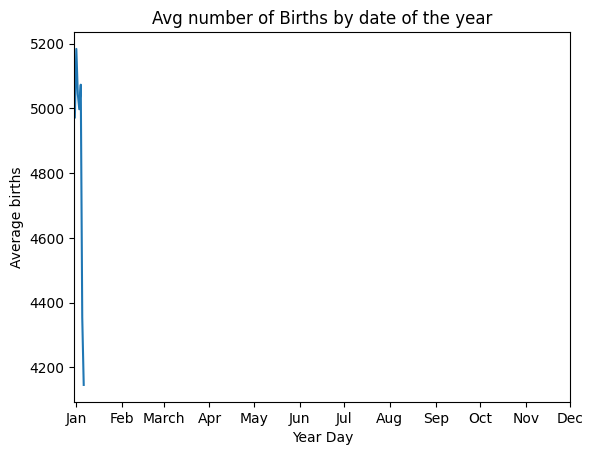

In [65]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')


df = df.dropna(subset=['date'])

df['week_day'] = df['date'].dt.dayofweek

#calulating the avg
avg_birth = df.groupby('week_day')['births'].mean()

dataframe_plot = pd.DataFrame(avg_birth)
dataframe_plot.reset_index(inplace=True)
dataframe_plot.columns = ['Year Day', 'Average Birth']

dataframe_plot = dataframe_plot[dataframe_plot['Average Birth'] < 5400]

plt.plot(dataframe_plot['Year Day'], dataframe_plot['Average Birth'])

plt.xlabel("Year Day")
plt.ylabel("Average births")
plt.title("Avg number of Births by date of the year")
plt.xticks(
    ticks=[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],
    labels=['Jan', "Feb", 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.show()


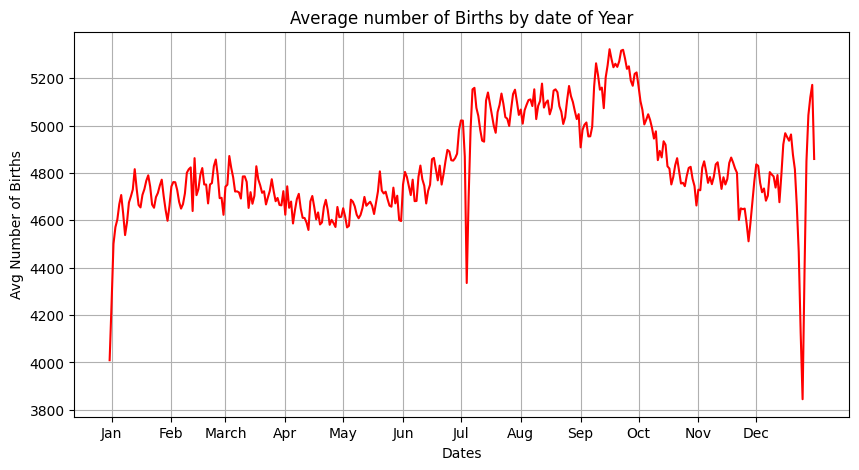

In [77]:
new_avg = df.groupby(['month', 'day'])['births'].mean()

df = pd.DataFrame(new_avg).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['births'], color='red')
plt.grid()
plt.xlabel("Dates")
plt.ylabel("Avg Number of Births")
plt.title("Average number of Births by date of Year")

plt.xticks(
    ticks=[1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335],
    labels=['Jan', "Feb", 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.show()
